<a href="https://colab.research.google.com/github/kwanhong66/TodayILearned/blob/master/kaggle/Kaggle_ML_DS_survey_2017_EDA_FAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 노트북 안에서 그래프를 그리기 위해서
%matplotlib inline

# Import the standard libs
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Igonre warnings
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data_root_dir = '/content/drive/My Drive/Colab Notebooks/data'

In [4]:
# load multiple choice question csv
mcq = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/multipleChoiceResponses.csv'),
                                    encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [0]:
question = pd.read_csv(os.path.join(data_root_dir, 'kaggle-survey-2017/schema.csv'))

## FAQ

###Q1. Python과 R중 어떤 언어를 배워야 할까요?

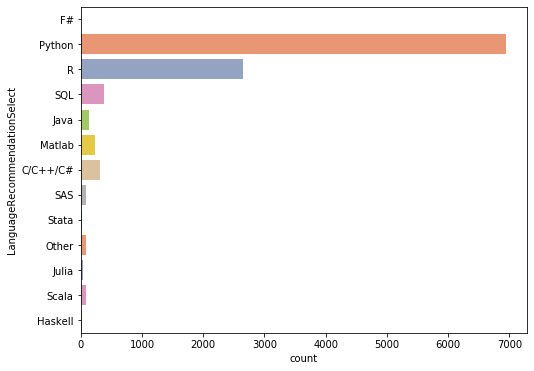

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(y='LanguageRecommendationSelect', data=mcq, palette='Set2')

- Python이 압도적으로 선호도가 높음

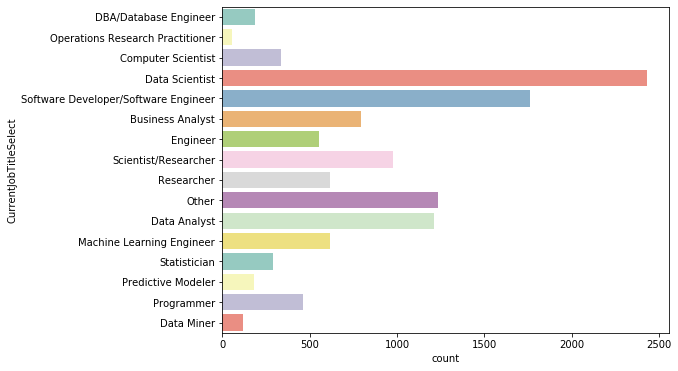

In [6]:
# Current Job
plt.figure(figsize=(8,6))
sns.countplot(y=mcq['CurrentJobTitleSelect'], palette='Set3')

In [7]:
# 현재 직업 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


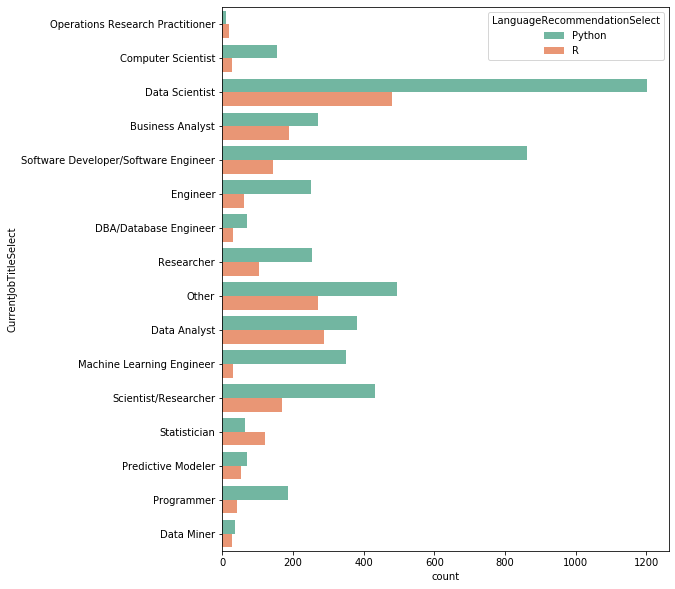

In [8]:
# 현재 하는 일에 대한 응답한 사람 중, Python과 R을 사용하는 사람
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | 
    (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
data.head(5)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data,
              palette='Set2')

### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 기술은?

- 데이터 사이언스 tool

In [9]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts()
)
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True)
)

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True
)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


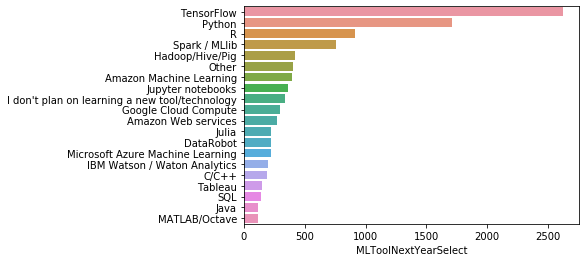

In [10]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

- Google의 딥러닝 프레임워크인 Tensorflow가 23%, Python이 15%, R은 8%

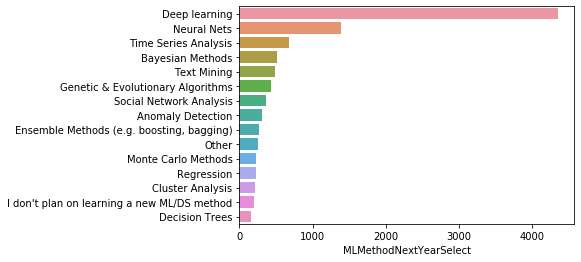

In [11]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

### Q3. 어디에서 데이터 사이언스를 배우나요?

In [13]:
# https://stackoverflow.com/questions/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas/22697903
# apply_platform_list_split = mcq['LearningPlatformSelect'].astype(str).apply(lambda x: x.split(','))
# Platform name is splitted in column
# apply_platform_list_split[:5]

mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype(str).apply(lambda x: x.split(','))

# apply lambda to 'LearningPlatformSelect' colum to flatten list value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
# https://rfriend.tistory.com/276
# stack 함수로 Learning... column의 리스트(Series)를 col 기준으로 stacking
# https://datascienceschool.net/view-notebook/a49bde24674a46699639c1fa9bb7e213/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
# multi-index에 대한 reset_index(); level: 해당 level index만 떨굼 drop: index를 일반 col로 올리지 않고 떨굼
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1
).stack().reset_index(level=1, drop=True)
s.head()

0    College/University
0           Conferences
0              Podcasts
0            Trade book
1                Kaggle
dtype: object

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
dtype: int64


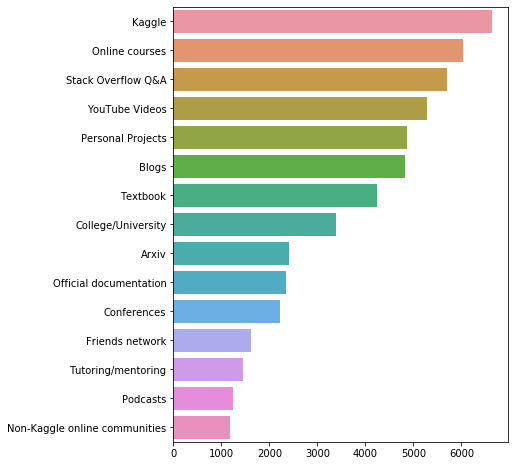

In [15]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
print(data)
sns.barplot(y=data.index, x=data)

- Kaggle은 응답자들 사이에서 가장 높은 선호도의 플랫폼
- 온라인 코스, 스택 오버플로우, 유튜브 등이 상위권

In [21]:
print(question['Column']) # 설문 항목
# LearningCategory라는 substring을 가진 column에 해당하는 내용 indexing
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
print(qc)

0                        GenderSelect
1                      GenderFreeForm
2                             Country
3                                 Age
4                    EmploymentStatus
                    ...              
285                   JobFactorRemote
286                 JobFactorIndustry
287         JobFactorLeaderReputation
288                JobFactorDiversity
289    JobFactorPublishingOpportunity
Name: Column, Length: 290, dtype: object
(7, 3)
                           Column  ... Asked
91    LearningCategorySelftTaught  ...   All
92  LearningCategoryOnlineCourses  ...   All
93           LearningCategoryWork  ...   All
94     LearningCategoryUniversity  ...   All
95         LearningCategoryKaggle  ...   All
96          LearningCategoryOther  ...   All
97  LearningCategoryOtherFreeForm  ...   All

[7 rows x 3 columns]


In [31]:
print(question.columns)
question.loc[question['Column'].str.contains('LearningPlatformUsefulness')]
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]
use_features[:5]

Index(['Column', 'Question', 'Asked'], dtype='object')


['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences']

dict_keys(['Arxiv', 'Blogs', 'College', 'Company', 'Conferences', 'Friends', 'Kaggle', 'Newsletters', 'Communities', 'Documentation', 'Courses', 'Projects', 'Podcasts', 'SO', 'Textbook', 'TradeBook', 'Tutoring', 'YouTube'])
                    Arxiv     Blogs   College  ...  TradeBook  Tutoring   YouTube
Not Useful       0.015475  0.009444  0.030068  ...   0.027027  0.022440  0.019889
Somewhat useful  0.434128  0.504932  0.418279  ...   0.486486  0.399018  0.498183
Very useful      0.550397  0.485624  0.551652  ...   0.486486  0.578541  0.481928

[3 rows x 18 columns]
               Not Useful  Somewhat useful  Very useful
Projects         0.008135         0.247184     0.744681
Courses          0.007844         0.292056     0.700100
SO               0.011348         0.362411     0.626241
Kaggle           0.008507         0.372323     0.619171
Tutoring         0.022440         0.399018     0.578541
Textbook         0.016503         0.429562     0.553934
College          0.030068        

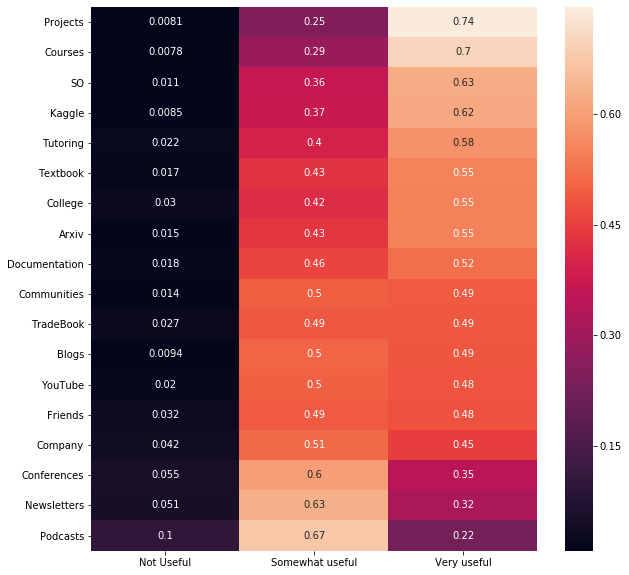

In [42]:
# 학습플랫폼과 유용함 연관성
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a / a.sum() # percent
  # feature is prefixed 'LearningPlatformUsefulness'
  # slicing prefix and use it as key
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

print(fdf.keys())

# dict to dataframe
# keys of dict = cols of dataframe / values of dict = rows of dataframe
fdf = pd.DataFrame(fdf)
print(fdf)
fdf = fdf.transpose().sort_values('Very useful', ascending=False)
print(fdf)

# heatmap for learning platform usefulness
plt.figure(figsize=(10,10))
sns.heatmap(fdf, annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

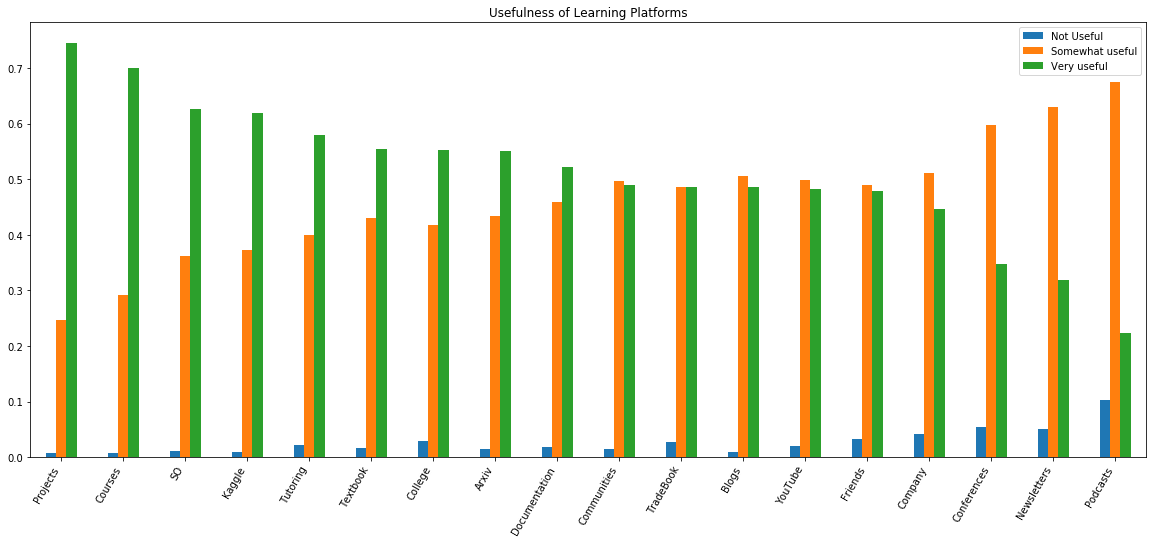

In [43]:
# dataframe plot
fdf.plot(kind='bar', figsize=(20,8),
         title='Usefulness of Learning Platforms')
plt.xticks(rotation=60, ha='right')

In [45]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [49]:
cdf = {}
print(mcq['LearningCategoryKaggle'])
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# for drawing Pie Chart
# dict to Series
cdf = pd.Series(cdf)
cdf

0         0.0
1        30.0
2         0.0
3         0.0
4         0.0
         ... 
16711     0.0
16712    10.0
16713     NaN
16714     NaN
16715     NaN
Name: LearningCategoryKaggle, Length: 16716, dtype: float64


SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

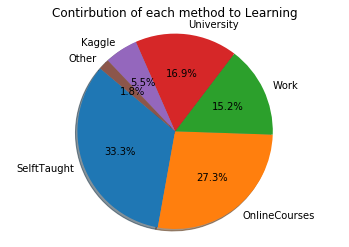

In [51]:
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contirbution of each method to Learning')
plt.show()

### Q4. 데이터 사이언스를 위해 높은 사양이 필요한가요?

In [53]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [54]:
# how many response which is not null
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [55]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)

s.name = 'hardware'
s.head()

0                       nan
1                       nan
2    Basic laptop (Macbook)
3                       nan
4                       nan
Name: hardware, dtype: object

In [56]:
s = s[s != 'nan']
s.head()

2                                Basic laptop (Macbook)
7                                Basic laptop (Macbook)
7             Gaming Laptop (Laptop + CUDA capable GPU)
10    Laptop or Workstation and local IT supported s...
12                               Basic laptop (Macbook)
Name: hardware, dtype: object

In [57]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

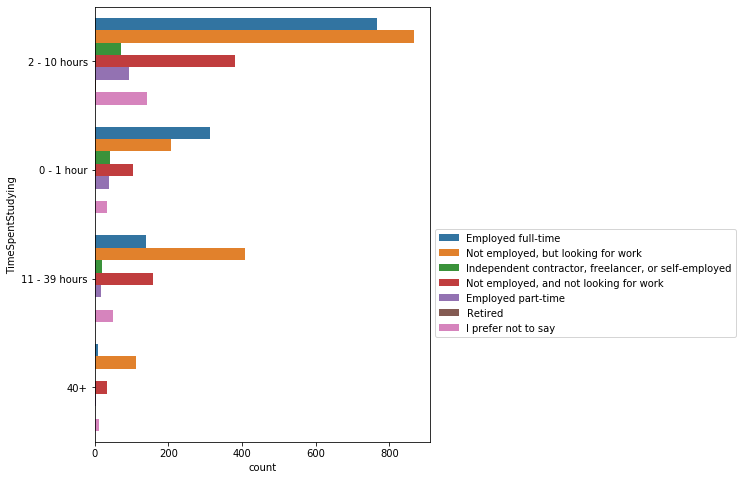

In [59]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus'
              ).legend(loc='center_left',
                       bbox_to_anchor=(1, 0.5))

In [62]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)
looking_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


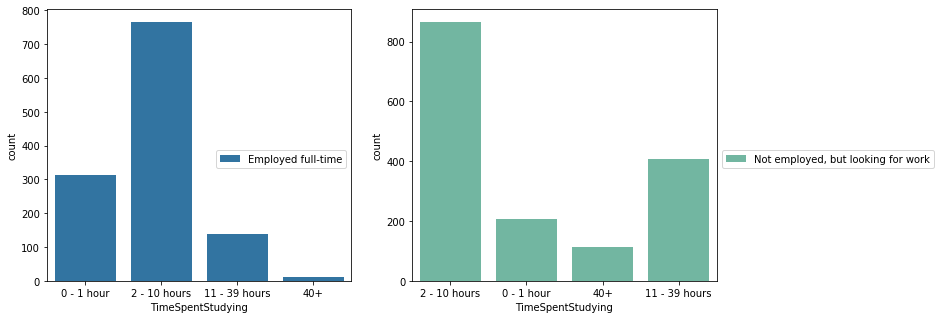

In [65]:
# full-time과 looking for work 공부 시간 비교
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.countplot(x='TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus', ax=ax1
              ).legend(loc='center_right',
                       bbox_to_anchor=(1, 0.5))
              
sns.countplot(x='TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus', ax=ax2,
              palette='Set2'
              ).legend(loc='center_right',
                       bbox_to_anchor=(1, 0.5))